In [1]:
from  calculate_similarity_resnet import ResnetSimilarity

from PIL import Image
from progressbar import ProgressBar

from nearpy import Engine
from nearpy.hashes import RandomBinaryProjections
from nearpy.distances import CosineDistance
from nearpy.distances import EuclideanDistance

import sys


import pickle
import os
from nearpy.storage import MemoryStorage

from IPython.display import  display
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# pic_one = Image.open("./data/flower_data/train/1/image_06734.jpg")
# pic_one1 = Image.open("./data/flower_data/train/1/image_06734.jpg")
# pic_two = Image.open("./data/flower_data/train/21/image_06774.jpg")
# pic_three = Image.open("./data/download.jpeg")

### Form ResnetSimmilarity we can get embedding of a vector 

- get image embedding
        - ResnetSimmilarity() returns the image embedding by passing it through resnet Model 
- initialize LSH and add each image embedding 
- save hash table in pkl file

In [3]:
res = ResnetSimilarity()
pbar = ProgressBar()

In [4]:
# Dimension of our vector space
dimension = 2048

# Create a random binary hash with 10 bits
rbp = RandomBinaryProjections('rbp', 10)


msote = MemoryStorage()

engine = Engine(dimension, lshashes=[rbp],storage=msote,distance=EuclideanDistance())

In [5]:
%%time
## Adding the Images to the Hash Table
rootdir = 'data/classed_data/train/'

count = 0
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if '.jpg' in file:
            img_path = os.path.join(subdir, file)
            img = Image.open(img_path)
            
            if img.size[0] >=100:
                img_emb = res.getMapping(img)
                img_emb = img_emb.view(-1,2048)
                img_emb = img_emb.numpy()


                engine.store_vector(img_emb[0],img_path)
                if count%1000 == 0:
                    print("Saving  Image Embedding ",count)

                count += 1
print(count)

Saving  Image Embedding  0
Saving  Image Embedding  1000
Saving  Image Embedding  2000
Saving  Image Embedding  3000
Saving  Image Embedding  4000
Saving  Image Embedding  5000
Saving  Image Embedding  6000
Saving  Image Embedding  7000
Saving  Image Embedding  8000
Saving  Image Embedding  9000
Saving  Image Embedding  10000
Saving  Image Embedding  11000
Saving  Image Embedding  12000
Saving  Image Embedding  13000
Saving  Image Embedding  14000
Saving  Image Embedding  15000
Saving  Image Embedding  16000
Saving  Image Embedding  17000
Saving  Image Embedding  18000
Saving  Image Embedding  19000
Saving  Image Embedding  20000
Saving  Image Embedding  21000
Saving  Image Embedding  22000
Saving  Image Embedding  23000
Saving  Image Embedding  24000
Saving  Image Embedding  25000
Saving  Image Embedding  26000
Saving  Image Embedding  27000
Saving  Image Embedding  28000
Saving  Image Embedding  29000
Saving  Image Embedding  30000
Saving  Image Embedding  31000
Saving  Image Embeddi

In [6]:
%%time
filehandler = open("hashed_object_equilidian.pkl", 'wb')
pickle.dump(engine, filehandler)


CPU times: user 720 ms, sys: 1.09 s, total: 1.81 s
Wall time: 4.15 s


### Restore Hased Table 

- read stored hash table 
- perform a search query 

In [11]:
%%time
filehandler = open("hashed_object_equilidian.pkl", 'r')
en_loaded = pickle.load(filehandler)

CPU times: user 21.5 s, sys: 1.3 s, total: 22.8 s
Wall time: 22.8 s


(1, 2048)


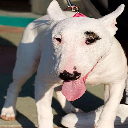

In [16]:

pic_one1  = Image.open("./data/classed_data/val/Dog/b8f75a7e8e6def6c.jpg")

# image to test query
pic_one1_emb = res.getMapping(pic_one1)
pic_one1_emb = pic_one1_emb.view(-1,2048)
pic_one1_emb = pic_one1_emb.numpy()

print(pic_one1_emb.shape)


query = pic_one1_emb[0]

display(pic_one1.resize((128,128)))

#### Query on one image and get simmilarity result

(0.08684, 'data/classed_data/train/Plant/d3a4de03ab904fc3.jpg')


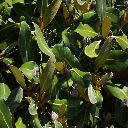

(0.0874, 'data/classed_data/train/Dog/5ce52f22cb1ca056.jpg')


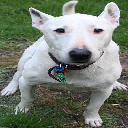

(0.08741, 'data/classed_data/train/Human face/531e105f0f382294.jpg')


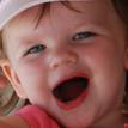

(0.08747, 'data/classed_data/train/Human arm/273d76c3c5029109.jpg')


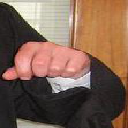

(0.08758, 'data/classed_data/train/Mammal/e4a934834d2bba41.jpg')


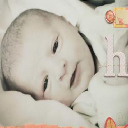

(0.08763, 'data/classed_data/train/Person/5a2ca3f1777ef444.jpg')


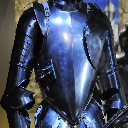

(0.08765, 'data/classed_data/train/Human mouth/489b8628e0f419a5.jpg')


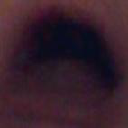

(0.08772, 'data/classed_data/train/Dog/d9d3c313a971cbd6.jpg')


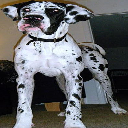

(0.08779, 'data/classed_data/train/Human hair/7bf5d17526986912.jpg')


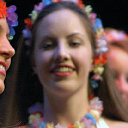

(0.08779, 'data/classed_data/train/Human head/ae898ad8ae1f8cfd.jpg')


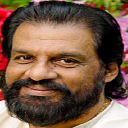

CPU times: user 1.01 s, sys: 128 ms, total: 1.14 s
Wall time: 989 ms


In [17]:
%%time

N = en_loaded.neighbours(query)
for i in range(len(N)):
    print(round(float(N[i][2]),5),N[i][1])
    img = Image.open(N[i][1])
    img = img.resize((128,128))
    display(img)
    if i == 10:
        break
    

### Evaluation For The whole val folder


In [ ]:
%%time
import csv
## Adding the Images to the Hash Table
rootdir = 'data/classed_data/val/'

count = 0

with open("data/output.csv",'wb') as resultFile:
    wr = csv.writer(resultFile, quoting=csv.QUOTE_ALL)
    for subdir, dirs, files in os.walk(rootdir):
        for file in files:
            if '.jpg' in file:
                output = []
                img_path = os.path.join(subdir, file)
                img = Image.open(img_path)

                img_emb = res.getMapping(img)
                img_emb = img_emb.view(-1,2048)
                img_emb = img_emb.numpy()
                query = img_emb[0]
                N = en_loaded.neighbours(query)

                output_item = [N[i][1] for i in range(len(N))]
                output.append(img_path)
                for i in output_item:
                    output.append(i)
                wr.writerows([output])
#                 print(output)


In [ ]:
def save_img(files,image_name):
    result = Image.new("RGB", (1600, 800))

    for index, file in enumerate(files):
      path = os.path.expanduser(file)
      img = Image.open(path)
      img = img.resize((390,390))
      img.thumbnail((400, 400), Image.ANTIALIAS)
      x = index // 2 * 400
      y = index % 2 * 400
      w, h = img.size
      result.paste(img, (x, y, x + w, y + h))

    print('saving',files[0],image_name)
    result.save(image_name)

In [ ]:
import csv
import random

with open('data/output.csv') as csvfile:
    data_class = list(csv.reader(csvfile))

    
random.shuffle(data_class)

In [ ]:
for i in range(len(data_class)):
    img = Image.open(data_class[i][:-4][0])
    if img.size[0] >= 100:
        save_img(data_class[i][:-4],"data/sample_out/"+str(i)+".jpg")

